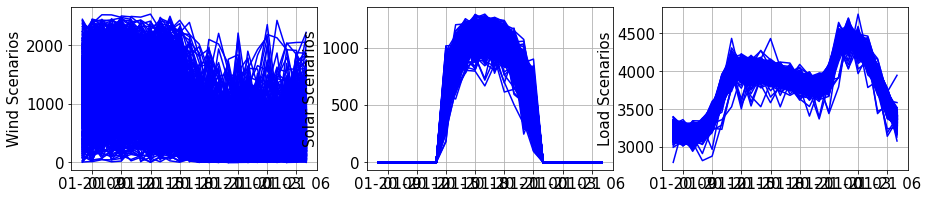

In [1]:
import bz2
import dill as pickle
import pandas as pd
import csv
import matplotlib.pyplot as plt
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
out_file = "scens_2020-01-20.p.gz"
with bz2.BZ2File(out_file, "rb") as f:
    scenarios = pickle.load(f)
    #print(day_scens[])
df = pd.DataFrame([scenarios])
#print(dict.keys(scenarios))
WindScenarios=scenarios['Wind']['309_WIND_1']+scenarios['Wind']['303_WIND_1']+scenarios['Wind']['122_WIND_1']+scenarios['Wind']['317_WIND_1']
#print(WindScenarios)
SolarAsset=['320_PV_1', '314_PV_1', '314_PV_2', '313_PV_1', '314_PV_3', '314_PV_4', '313_PV_2', '310_PV_1', '324_PV_1', '312_PV_1', '310_PV_2', '324_PV_2', '324_PV_3', '113_PV_1', '319_PV_1', '215_PV_1', '102_PV_1', '101_PV_1', '102_PV_2', '104_PV_1', '101_PV_2', '101_PV_3', '101_PV_4', '103_PV_1', '119_PV_1']
#print(len(SolarAsset))
SolarScenarios=scenarios['Solar'][SolarAsset[0]]
for i in range(1,25):
    SolarScenariosNew=scenarios['Solar'][SolarAsset[i]]
    SolarScenarios=SolarScenarios+SolarScenariosNew
#print(SolarScenarios)
LoadScenarios=scenarios['Load']['1']+scenarios['Load']['2']+scenarios['Load']['3']

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Wind Scenarios",fontsize=15)
plt.plot(WindScenarios.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Solar Scenarios",fontsize=15)
plt.plot(SolarScenarios.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.set_ylabel("Load Scenarios",fontsize=15)
plt.plot(LoadScenarios.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

Process RTS sample scenarios to understand input-output relationship between RTS scenarios and Vatic outputs:
(i) total daily system costs; (ii) lost load; (iii) renewable curtailment.

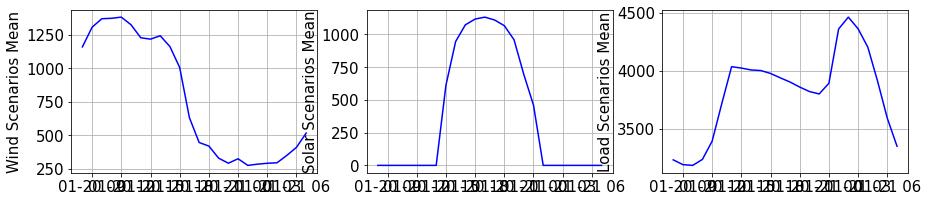

In [2]:
from numpy import mean
WindMean = mean(WindScenarios)
SolarMean = mean(SolarScenarios)
LoadMean = mean(LoadScenarios)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Wind Scenarios Mean",fontsize=15)
plt.plot(WindMean.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Solar Scenarios Mean",fontsize=15)
plt.plot(SolarMean.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.set_ylabel("Load Scenarios Mean",fontsize=15)
plt.plot(LoadMean.T,'b')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

11


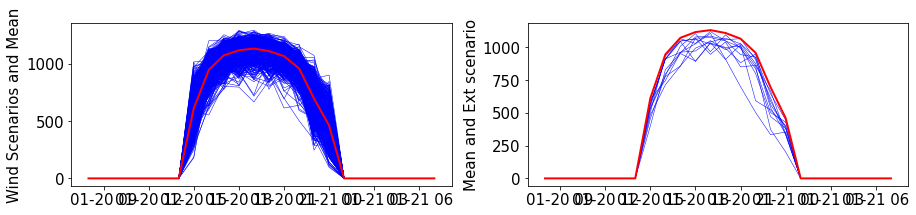

In [3]:
DifferenceLoadWindSolar=SolarScenarios
MeanDiff=mean(DifferenceLoadWindSolar)
import matplotlib.pyplot as plt
import numpy as np
import math
Thresold=MeanDiff
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,2,1)
ax.tick_params(labelsize=15)
ax.set_ylabel("Wind Scenarios and Mean",fontsize=15)
plt.plot(DifferenceLoadWindSolar.T,'b', label='Difference', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

index=[]
time=WindScenarios.keys()
ax = fig.add_subplot(1,2,2)
ax.tick_params(labelsize=15)
ax.set_ylabel("Mean and Ext scenario",fontsize=15)
for k in range(0,1000):
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    check=(ScenArray-Thresold)
    CheckArray=[]
    for t in range(6,17):
        CheckArray.append(check[time[t]])
    if(all(x < 0 for x in CheckArray)):
        plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
        index.append(k)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
print(len(index))
plt.show()

We consider all load, solar and wind to be stochastic and in that case we try to understand the relationship between the scenarios and the vatic output

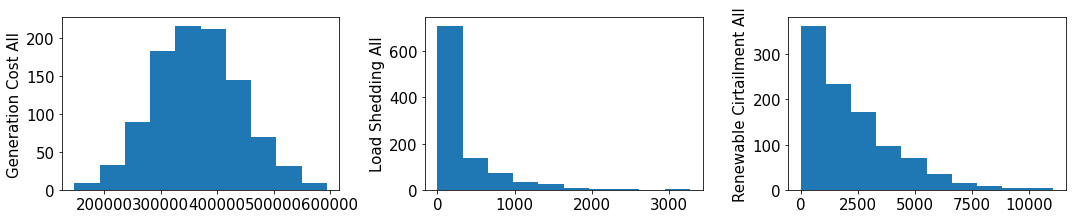

In [4]:
import bz2
import dill as pickle
import pandas as pd
import csv
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
out_file = "daily_summary.p.gz"
with bz2.BZ2File(out_file, "rb") as f:
    day_scens = pickle.load(f)
    #print(day_scens[])
df = pd.DataFrame([day_scens])
#print(dict.keys(day_scens))
LoadSheddingAll=day_scens[()]['Load shedding']
#print(LoadShedding)
GenerationCostAll=day_scens[()]['Generation costs']
#print(GenerationCost)
RenewableCurtailmentAll=day_scens[()]['Renewables curtailment']
#print(RenewablesCurtailment)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Generation Cost All",fontsize=15)
ax.hist(GenerationCostAll)
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Load Shedding All",fontsize=15)
ax.hist(LoadSheddingAll)
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.hist(RenewableCurtailmentAll)
ax.set_ylabel("Renewable Cirtailment All",fontsize=15)
ax.tick_params(labelsize=15)
plt.tight_layout()
plt.savefig("C:\\Users\\Mahashweta Patra\\Documents\\MikeLudkovski\\ORFEUSRTS\\type-pwrset-jan20-20211229T210546Z-001\\type-pwrset-jan20\\Figures\\VaticOutputAll.png", dpi=300)


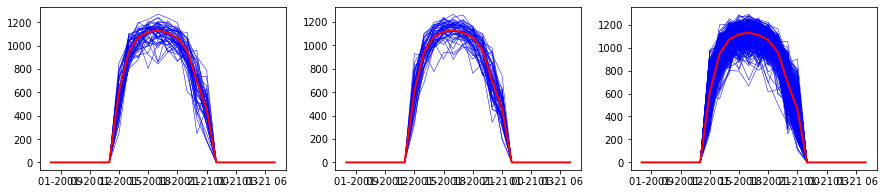

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math
GenCostSortedAll=[]
LoadShedSortedAll=[]
CurtailSortedAll=[]
for i in range(0,1000):
    a=GenerationCostAll[i]
    b=RenewableCurtailmentAll[i]
    GenCostSortedAll.append(a)
    CurtailSortedAll.append(b)
#GenCostSorted.sort(reverse=True)
#print(GenCostSorted)

sort_indexGenCostAll = np.argsort(GenCostSortedAll)
#print("Scenario indices that causes highest 5% generation cost:", sort_indexGenCostAll[950:1000])
sort_index_curAll = np.argsort(CurtailSortedAll)
#print("Scenario indices that causes highest 5% renewable curtailment:", sort_index_curAll[950:1000])

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

ax = fig.add_subplot(1,3,2)
for k in sort_index_curAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

LoadShedSortedAll=[]
for i in range(0,1000):
    a=LoadSheddingAll[i]
    LoadShedSortedAll.append(a)
LoadShedSortedAll=np.nonzero(LoadShedSortedAll)

ax = fig.add_subplot(1,3,3)
for k in LoadShedSortedAll:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

9162.710387499998
[8704.015200000002, 8887.5162, 9164.861499999999, 9611.5864, 9044.3972, 8439.694800000001, 9243.487799999999, 8846.8554, 8892.1514, 8976.3597, 9753.263500000001, 9593.141599999999, 9534.877199999999, 9180.912, 8739.9079, 9625.3381, 9949.9076, 9187.6512, 9422.015, 10526.650099999999, 8453.921400000001, 8981.0582, 8829.9885, 8312.941499999999, 9457.0557, 8904.2352, 9240.602900000002, 8930.2759, 9664.721599999999, 9334.8903, 9102.760300000002, 8974.4594, 8951.1986, 9640.4568, 9177.1335, 8470.92, 9134.088899999999, 8517.111499999999, 8475.898000000001, 10331.567, 8424.930799999998, 9000.919, 10049.796000000002, 8892.5147, 9058.501400000001, 9169.005799999999, 9171.4195, 9352.6796, 9354.5277, 9309.1933, 9486.1686, 9484.813499999998, 9192.4203, 9598.4534, 9646.926800000001, 8592.7435, 8546.9538, 10178.419, 9868.4523, 8198.3352, 10077.4022, 8922.780999999999, 9500.7, 9645.0481, 8525.0184, 9440.2163, 9564.3487, 8993.579600000001, 9307.7617, 9740.4146, 8954.3017, 9567.76129999

472

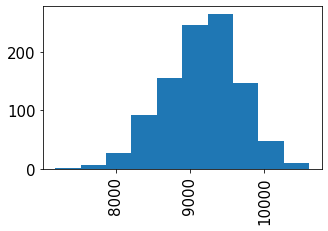

In [6]:
ThresoldCompArray=[]
for i in range(0,24):
    ThresoldComp=Thresold[time[i]]
    ThresoldCompArray.append(ThresoldComp)
#print(ThresoldCompArray)
import numpy as np  
SumThresold=np.sum(ThresoldCompArray)
print(SumThresold)
IntegrationScen=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    IntegrationScen.append(np.sum(ScenArray))
print(IntegrationScen)
fig = plt.figure(figsize=(5,3))
#ax.set_ylabel("Wind Histogram")
ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
#ax.set_ylim([0, 800])
ax.hist(IntegrationScen, bins=10)
plt.xticks(rotation=90)
#plt.title('C')
sum(i < SumThresold for i in IntegrationScen)

Number of extreme scenarios causing higher generation cost: 8


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

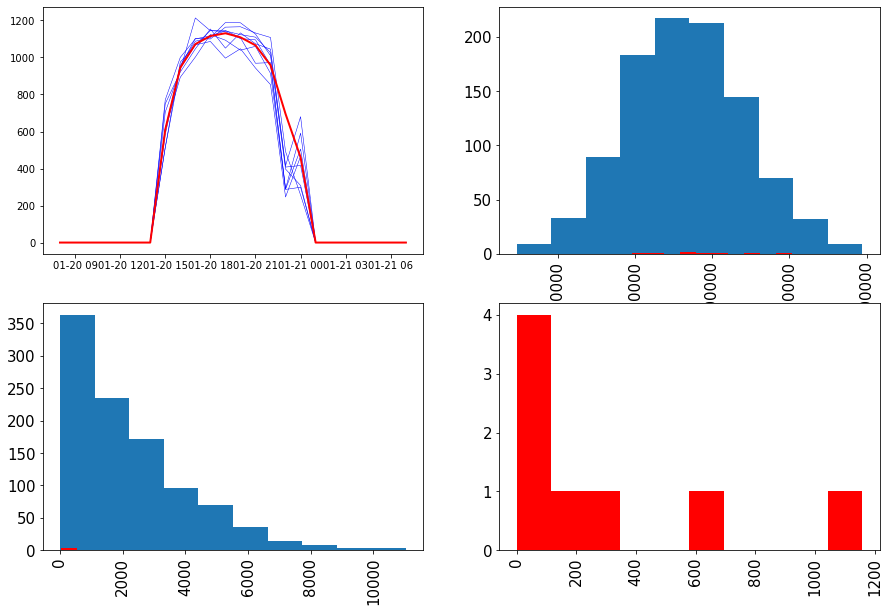

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,2,1)
jumpidx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    jump=abs(DifferenceLoadWindSolar[time[15]][k]-DifferenceLoadWindSolar[time[14]][k])
    jump2=DifferenceLoadWindSolar[time[16]][k]
    if (jump>600):# and jump2>2800):
        plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
        jumpidx.append(k)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

print("Number of extreme scenarios causing higher generation cost:",len(jumpidx))
#print("The scenarios causing higher generation cost:", jumpidx)
HighGenCost=[]
for i in jumpidx:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)

ax = fig.add_subplot(2,2,2)
ax.tick_params(labelsize=15)
ax.hist(GenerationCostAll)
ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)

HighCur=[]
for i in jumpidx:
    HighCur.append(RenewableCurtailmentAll[i])
#print("Renewable curtailment values for the scenarios that causes high generation cost",HighCur)
ax = fig.add_subplot(2,2,3)
ax.tick_params(labelsize=15)
ax.hist(RenewableCurtailmentAll)
ax.hist(HighCur, bins=10,color = "red")
plt.xticks(rotation=90)

ExtLoad=[]
for i in jumpidx:
    ExtLoad.append(LoadSheddingAll[i])
#print("Load shedding values for the scenarios that causes high generation cost",ExtLoad)
ax = fig.add_subplot(2,2,4)
ax.tick_params(labelsize=15)
#ax.hist(LoadSheddingAll)
ax.hist(ExtLoad, bins=10,color = "red")
plt.xticks(rotation=90)

[7914.601, 7864.8089, 7765.6257000000005, 7578.768499999999, 7945.794, 7819.3819, 7888.335300000001, 7723.7162, 7981.265500000001, 7514.6094, 7189.6218, 7238.8716, 7991.4154, 7899.018, 7654.3182, 7725.4239]
16


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

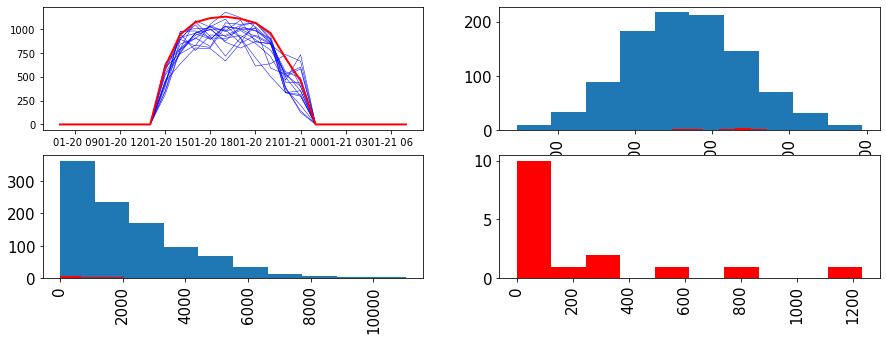

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(2,2,1)
IntegrationScen=[]
ExtScenIdx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    a=np.sum(ScenArray)
    if (a<8000):
        IntegrationScen.append(a)
        ExtScenIdx.append(k)
        plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
print(IntegrationScen)
NumExtScen=sum(i < SumThresold for i in IntegrationScen)
print(NumExtScen)
HighGenCost=[]
for i in ExtScenIdx:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)

ax = fig.add_subplot(2,2,2)
ax.tick_params(labelsize=15)
ax.hist(GenerationCostAll)
ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)

HighCur=[]
for i in ExtScenIdx:
    HighCur.append(RenewableCurtailmentAll[i])
#print("Renewable curtailment values for the scenarios that causes high generation cost",HighCur)
ax = fig.add_subplot(2,2,3)
ax.tick_params(labelsize=15)
ax.hist(RenewableCurtailmentAll)
ax.hist(HighCur, bins=10,color = "red")
plt.xticks(rotation=90)

ExtLoad=[]
for i in ExtScenIdx:
    ExtLoad.append(LoadSheddingAll[i])
#print("Load shedding values for the scenarios that causes high generation cost",ExtLoad)
ax = fig.add_subplot(2,2,4)
ax.tick_params(labelsize=15)
#ax.hist(LoadSheddingAll)
ax.hist(ExtLoad, bins=10,color = "red")
plt.xticks(rotation=90)
#print(time)

Text(0, 0.5, 'Generation cost')

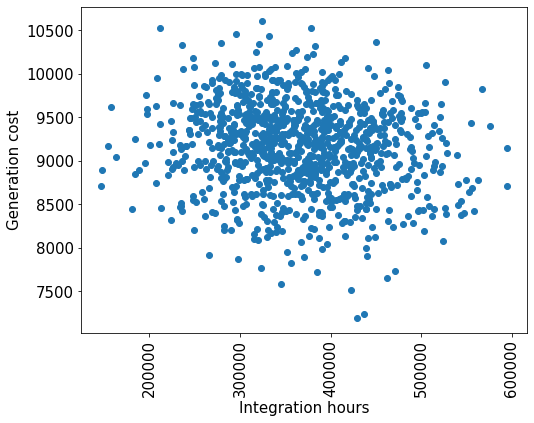

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(8,6))
ax.tick_params(labelsize=15)
IntegrationScen=[]
ExtScenIdx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    a=np.sum(ScenArray)
    IntegrationScen.append(a)
    ExtScenIdx.append(k)
    #plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
#plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
#print(IntegrationScen)
NumExtScen=sum(i > SumThresold for i in IntegrationScen)
#print(NumExtScen)
HighGenCost=[]
for i in ExtScenIdx:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)

ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
plt.scatter(HighGenCost,IntegrationScen)
#ax.hist(GenerationCostAll)
#ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)
ax.set_xlabel("Integration hours",fontsize=15)
ax.set_ylabel("Generation cost",fontsize=15)